# Mengimpor library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menyiapkan plotting untuk keperluan analisis
sns.set(style="whitegrid")

# Menampilkan versi library untuk memastikan kompatibilitas
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")


Pandas Version: 2.2.2
NumPy Version: 1.26.4


# Memuat dataset

In [2]:
file_url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
dataset = pd.read_csv(file_url)

# Menampilkan 5 baris pertama dataset

In [3]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Menampilkan dataset

In [4]:
# Informasi tentang dataset
dataset.info()

# Statistik deskriptif
dataset.describe()

# Menampilkan jumlah nilai yang hilang di setiap kolom
print("Jumlah nilai yang hilang:")
print(dataset.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
Jumlah nilai yang hilang:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_valu

# Visualisasi distribusi target (median_house_value)

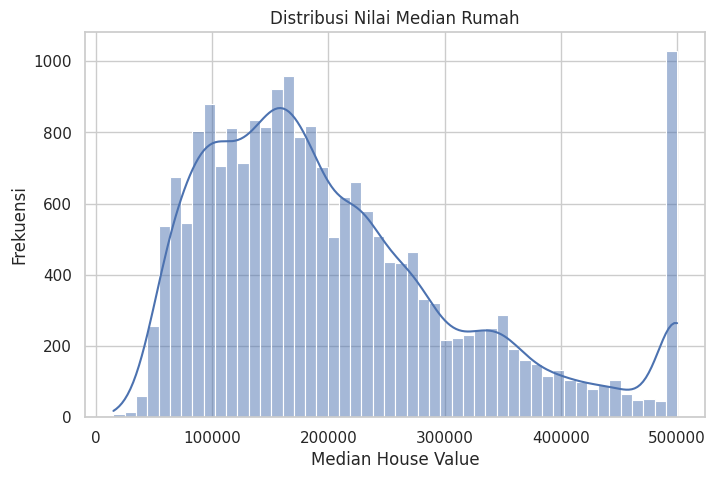

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset['median_house_value'], bins=50, kde=True)
plt.title("Distribusi Nilai Median Rumah")
plt.xlabel("Median House Value")
plt.ylabel("Frekuensi")
plt.show()


# Korelasi antara fitur

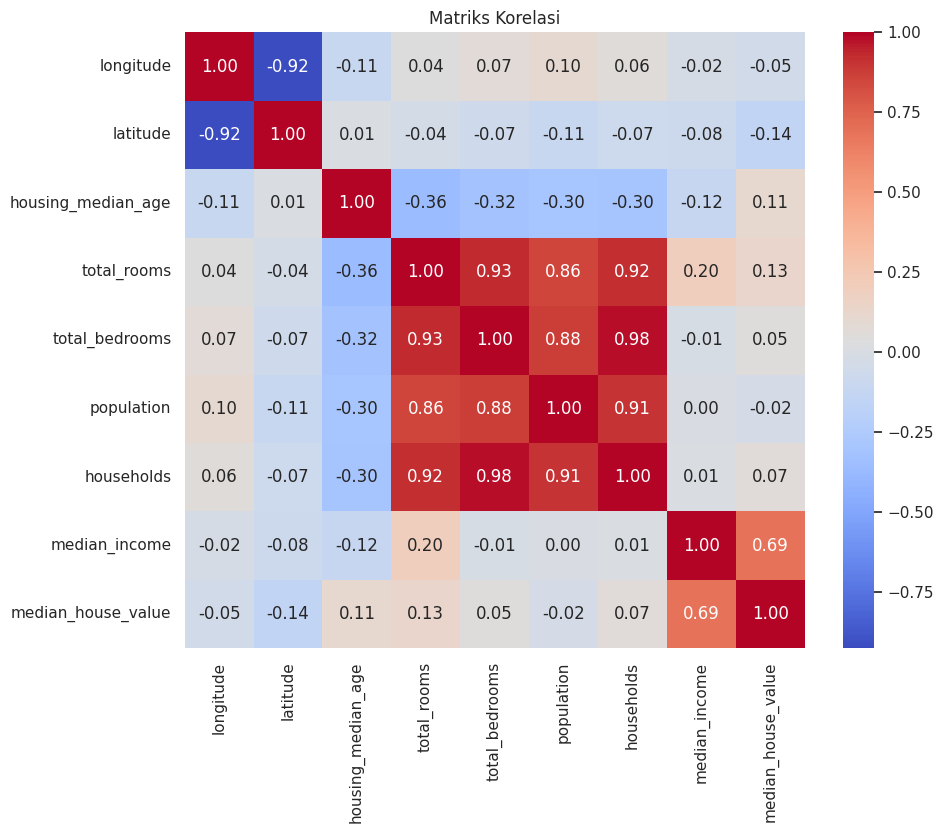

In [6]:
plt.figure(figsize=(10, 8))
# Calculate correlation only for numeric features
numeric_data = dataset.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# Membersihkan data

In [7]:
# Mengisi nilai yang hilang dengan median
dataset['total_bedrooms'] = dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].median())

# Memeriksa kembali nilai yang hilang
print("Jumlah nilai yang hilang setelah pembersihan:")
print(dataset.isnull().sum())


Jumlah nilai yang hilang setelah pembersihan:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Dalam dataset "California Housing Prices", kolom ocean_proximity adalah variabel kategorikal yang perlu diubah menjadi format numerik (encoding).

In [8]:
# Encoding kolom kategorikal 'ocean_proximity' menggunakan One-Hot Encoding
encoded_data = pd.get_dummies(dataset, columns=['ocean_proximity'], drop_first=True)

# Memeriksa dataset setelah encoding
print(encoded_data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1     

## Proses Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

# Menyalin dataset untuk proses scaling
scaled_data = encoded_data.copy()

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Identifikasi kolom numerik untuk scaling
numerical_features = ['longitude', 'latitude', 'housing_median_age',
                      'total_rooms', 'total_bedrooms', 'population',
                      'households', 'median_income']

# Menerapkan scaling pada kolom numerik
scaled_data[numerical_features] = scaler.fit_transform(scaled_data[numerical_features])

# Memastikan data telah di-scale
print(scaled_data[numerical_features].head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  
0   -0.974429   -0.977033       2.344766  
1    0.861439    1.669961       2.332238  
2   -0.820777   -0.843637       1.782699  
3   -0.766028   -0.733781       0.932968  
4   -0.759847   -0.629157      -0.012881  


# Pembagian data

In [10]:
# Memisahkan fitur dan target setelah scaling
X = scaled_data.drop('median_house_value', axis=1)
y = scaled_data['median_house_value']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


Jumlah data latih: 16512
Jumlah data uji: 4128


# Linear regression

* Melatih model regresi linier dengan data latih.


In [11]:
# Membuat model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Linear Regression Evaluation Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Linear Regression Evaluation Metrics:
Mean Absolute Error: 50670.73824097188
Mean Squared Error: 4908476721.156619
R-squared: 0.6254240620553604


## Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print(f"Random Forest Regressor Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R-squared (R^2): {rf_r2}")


Random Forest Regressor Evaluation Metrics:
Mean Absolute Error (MAE): 31642.75753633721
Mean Squared Error (MSE): 2404389528.630863
R-squared (R^2): 0.8165160977560968


## Hasil perbandingan nilai aktual dengan Linear regression dan Random forest regressor

In [15]:
import pandas as pd

# Contoh data hasil prediksi
# Ganti dengan nilai aktual dan prediksi model Anda
actual_values = y_test[:5].tolist()  # Nilai aktual dari data uji (contoh: gunakan y_test)
linear_regression_preds = model.predict(X_test[:5])  # Prediksi dari Linear Regression
random_forest_preds = rf_model.predict(X_test[:5])  # Prediksi dari Random Forest Regressor

# Membuat DataFrame untuk menampilkan hasil
predictions_df = pd.DataFrame({
    'Nilai Aktual': actual_values,
    'Linear Regression Predictions': linear_regression_preds,
    'Random Forest Predictions': random_forest_preds
})

# Menampilkan tabel hasil
predictions_df.head()


,Nilai Aktual,Linear Regression Predictions,Random Forest Predictions
0,47700.0,54055.448899,51521.0
1,45800.0,124225.338937,69792.0
2,500001.0,255489.379492,466710.4
3,218600.0,268002.431569,247533.0
4,278000.0,262769.434816,266979.0


# Ploting hasil prediksi dan nilai aktual

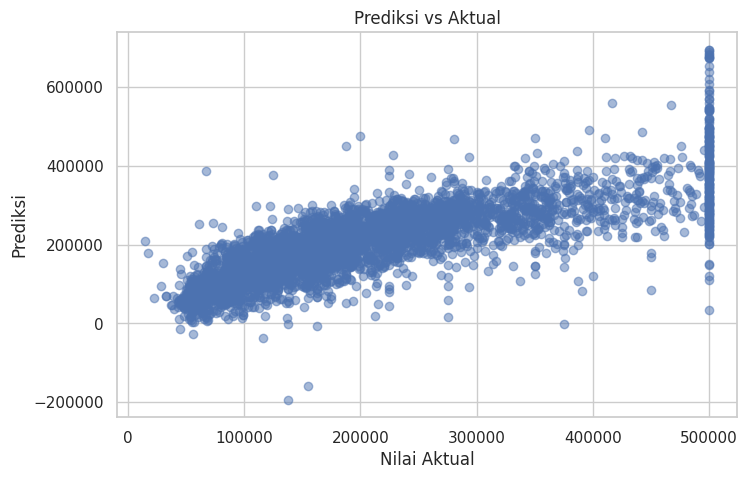

In [16]:
# Membandingkan hasil prediksi dengan nilai aktual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Prediksi vs Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.show()
